# Jawablah poin-poin assignment berikut
#### perhatikan dengan baik apa yang diminta pada soal

# 1. Anda bekerja sebagai seorang data scientist, atasan anda mengirimkan anda data kepada anda dan meminta untuk memberikan analisa dengan menggunakan semua metode pada data manipulation berikut :
- a. Filtering
- b. Sorting
- c. Grouping / Aggregasi
- d. Join / Merging
- e. Pivot
- f. Crosstab
- g. Appending
- h. Mengeksplor terkait dengan operasi pada Datetime (week, day, dan sebagainya)
### Notes : Sebelum menjawab permintaan diatas, pertama-tama awali dengan mengajukan pertanyaan analisa terlebih dahulu dan tulis insight dari yang anda dapat, **pertanyaan analisa dilakukan pada semua metode data manipulation diatas**

In [ ]:
# --- Data Manipulation ----
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

#--- Numerical Computation ----
import numpy as np

In [ ]:
# mengambil dataset dari gdrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# menampilkan data dr supermarket pada 5 baris pertama
df_supermarket = pd.read_csv('/content/drive/MyDrive/Dataset Dibimbiming/supermarket_sales.csv')
df_supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df_supermarket.info() # menampilkan tipe data dr dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df_supermarket.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

#A. Filtering
Anda sebagai seorang data scientist yang bekerja di sebuah kantor supermarket. Lalu, ada permintaan dari user atau klien minta tolong ke DS ingin melihat distribusi tabel dengan kriteria berikut : <br>
1. tolong tampilkan tipe customer yang memiliki rating dengan rata-rata diatas 5 pada product line nya electronic accessories yang berada di city Yangon

In [ ]:
# mencari nilai rata-rata dari data supermarket
mean_rating = np.mean(df_supermarket['Rating'])
mean_rating

np.float64(6.9727)

In [ ]:
# memfilter dataset yg bertipe electornic accessories dan city nya yangon dan diatas rata-rata
a_1 = df_supermarket[(df_supermarket['Rating'] > mean_rating) & (df_supermarket['Product line'] == 'Electronic accessories') & (df_supermarket['City'] == 'Yangon')]
a_1.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
12,365-64-0515,A,Yangon,Normal,Female,Electronic accessories,46.95,5,11.7375,246.4875,2/12/2019,10:25,Ewallet,234.75,4.761905,11.7375,7.1
23,636-48-8204,A,Yangon,Normal,Male,Electronic accessories,34.56,5,8.6400,181.4400,2/17/2019,11:15,Ewallet,172.80,4.761905,8.6400,9.9
95,594-34-4444,A,Yangon,Normal,Male,Electronic accessories,97.16,1,4.8580,102.0180,3/8/2019,20:38,Ewallet,97.16,4.761905,4.8580,7.2
105,704-48-3927,A,Yangon,Member,Male,Electronic accessories,88.67,10,44.3350,931.0350,1/12/2019,14:50,Ewallet,886.70,4.761905,44.3350,7.3
136,700-81-1757,A,Yangon,Normal,Female,Electronic accessories,26.31,5,6.5775,138.1275,1/18/2019,20:59,Credit card,131.55,4.761905,6.5775,8.8


In [ ]:
# menampilkan jumlah tipe orang dengan syarat dr soal
a_1.value_counts('Customer type')

,count
Customer type,
Member,17
Normal,12


Dari hasil tersebut, kita bisa lihat bahwa tipe customer yang paling banyak dalam kasus ini ialah tipe member. Hal ini mungkin dikarenakan sebagian tipe customer itu memiliki kemampuan elektronik yang cukup baik. Baik dari penggunaan maupun cara merawat peralatan yang cukup baik sehingga para customer balik lagi membeli peralatan yang ada dan bersikap royal kepada penjual

#B. Sorting, Grouping / Aggregisasi, dan Pivot

Anda sebagai seorang data scientist yang bekerja di sebuah kantor supermarket. Lalu, ada permintaan dari user atau klien minta tolong ke DS ingin melihat distribusi tabel dengan kriteria berikut : <br>
1. tolong tampilkan product line dengan rata-rata dan jumlah pada cogs dan secara masing-masing. Setelah itu, diurutkan berdasarkan rata-rata cogs dari hasil tabel tersebut

In [ ]:
# nembuat tabel baru dr dataset dan melakukan reset index dan sorting berdasarkan nilai yg paling besar
new_value = pd.pivot_table(
    data = df_supermarket,
    index = 'Product line',
    values = ['Total','cogs'],
    aggfunc = ['sum','mean']
).reset_index().sort_values(by = ('mean', 'cogs'), ascending = False)
new_value

Product line         sum                  mean            
                                Total      cogs       Total        cogs
4      Home and lifestyle  53861.9130  51297.06  336.636956  320.606625
5       Sports and travel  55122.8265  52497.93  332.065220  316.252590
3       Health and beauty  49193.7390  46851.18  323.643020  308.231447
2      Food and beverages  56144.8440  53471.28  322.671517  307.306207
0  Electronic accessories  54337.5315  51750.03  319.632538  304.411941
1     Fashion accessories  54305.8950  51719.90  305.089298  290.561236

Dari tabel tersebut untuk bagian sum, total dan cogs yang paling banyak ialah sport / travel dan food and beverages, sedangkan mean yang paling banyak dari total dan cogs ialah home and lifestyle. Hal ini dikarenakan jumlah kebutuhan lenih diperlukan untuk memasak, membuat makanan sesuai dengan kebutuhan, dan olahraga yang mendukung daya kesehatan sehingga kebutuhan untuk 2 hal itu sangat penting dilakukan oleh mereka, sedangkan kebutuhan untuk tempat tinggal emang rata-rata sangat dubutuhkan untuk sebagai tempat berlindung. Namun, untuk kategori yg lain perlu diperhatikan supaya beberapa kategori yang ada dpt saling memenuhi satu sama lain.

# C. Mengeksplor terkait dengan operasi pada Datetime (week, day, dan sebagainya)

Ubahlah Date dan Time menjadi waktu sesuai dengan kaidah di indonesia.

In [ ]:
df_supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
df_supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
# mengubah data type dr string menjadi waktu (date & time) berdasarkan data coloumn dr dataset
df_supermarket["Date"] = pd.to_datetime(df_supermarket["Date"],format="%m/%d/%Y")
df_supermarket['Time'] = pd.to_datetime(df_supermarket['Time'], format='%H:%M').dt.time
df_supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

In [ ]:
df_supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# menambahkan kolom hari, bulan dan tanggal dr dataset supermarket
df_supermarket['Days'] = df_supermarket['Date'].dt.day_name()
df_supermarket["Month"] = df_supermarket["Date"].dt.month
df_supermarket["Year"] = df_supermarket["Date"].dt.year
df_supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,Year
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1,2019
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,3,2019
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,2019
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,1,2019
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,2,2019


In [ ]:
# membuat syntax def yg mengisikan berbagai kondisi waktu bulan menjadi nama bulan
def month_name(x):
    if x == 1:
      return 'januari'
    elif x == 2:
      return 'februari'
    elif x == 3:
      return 'maret'
    elif x == 4:
      return 'april'
    elif x == 5:
      return 'mei'
    elif x == 6:
      return 'juni'
    elif x == 7:
      return 'juli'
    elif x == 8:
      return 'agustus'
    elif x == 9:
      return 'september'
    elif x == 10:
      return 'oktober'
    elif x == 11:
      return 'november'
    elif x == 12:
      return 'desember'
    else:
      return 'salah'

In [ ]:
# menambahkan data coloumn berdasarkan syntax def yg ada
df_supermarket['Bulan'] = df_supermarket['Month'].apply(month_name)
df_supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,Year,Bulan
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1,2019,januari
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,3,2019,maret
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,2019,maret
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,1,2019,januari
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,2,2019,februari


In which month that have the highest total ?

In [ ]:
month_order = pd.pivot_table(
    data = df_supermarket,
    index = 'Bulan',
    values = 'Total',
    aggfunc = 'sum'
).reset_index().sort_values(by = 'Total', ascending = False)
month_order

,Bulan,Total
1,januari,116291.868
2,maret,109455.507
0,februari,97219.374


In [ ]:
# Urutan bulan sesuai kalender
month_order_1 = ['januari', 'februari', 'maret']

# Mengatur kolom 'Month Name' sebagai kategori terurut
month_order['Bulan'] = pd.Categorical(month_order['Bulan'],
                                                   categories=month_order_1,
                                                   ordered=True)

# Mengurutkan dataframe berdasarkan urutan bulan
month_order = month_order.sort_values('Bulan')
month_order

,Bulan,Total
1,januari,116291.868
0,februari,97219.374
2,maret,109455.507


# D. Join / Merging

Pada bulan Januari hingga Maret 2019, kami melakukan campaign setiap hari Sabtu dan Minggu. Kami hendak menilai, apakah campaign tersebut cukup berdampak pada kenaikan penjualan (total). Mohon bantuan untuk menampilkan data:
1. Rata-rata harian penjualan weekends (Sabtu dan Minggu) vs rata-rata harian penjualan weekdays (Senin-Jumat) per bulan tersebut. Apakah ada peningkatan penjualan pada masing-masing bulan tersebut.

In [ ]:
# memfilter dataset berdasarkan hari sabtu dan minggu
df_weekend = df_supermarket[df_supermarket['Days'].isin(['Sunday','Saturday'])]
df_weekend.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,Year,Bulan
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08:00,Ewallet,522.83,4.761905,26.1415,9.1,Saturday,1,2019,januari
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23:00,Credit card,324.31,4.761905,16.2155,7.4,Sunday,3,2019,maret
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33:00,Ewallet,465.76,4.761905,23.2880,8.4,Sunday,1,2019,januari
7,315-22-5665,C,Naypyitaw,Normal,Female,Home and lifestyle,73.56,10,36.7800,772.3800,2019-02-24,11:38:00,Ewallet,735.60,4.761905,36.7800,8.0,Sunday,2,2019,februari
11,529-56-3974,B,Mandalay,Member,Male,Electronic accessories,25.51,4,5.1020,107.1420,2019-03-09,17:03:00,Cash,102.04,4.761905,5.1020,6.8,Saturday,3,2019,maret


In [ ]:
# memfilter dataset berdasarkan hari kerja
df_weekday = df_supermarket[df_supermarket['Days'].isin(['Monday','Tuesday','Wednesday','Thursday','Friday'])]
df_weekday.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Days,Month,Year,Bulan
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29:00,Cash,76.40,4.761905,3.8200,9.6,Friday,3,2019,maret
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37:00,Ewallet,604.17,4.761905,30.2085,5.3,Friday,2,2019,februari
5,699-14-3026,C,Naypyitaw,Normal,Male,Electronic accessories,85.39,7,29.8865,627.6165,2019-03-25,18:30:00,Ewallet,597.73,4.761905,29.8865,4.1,Monday,3,2019,maret
6,355-53-5943,A,Yangon,Member,Female,Electronic accessories,68.84,6,20.6520,433.6920,2019-02-25,14:36:00,Ewallet,413.04,4.761905,20.6520,5.8,Monday,2,2019,februari
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17:15:00,Credit card,72.52,4.761905,3.6260,7.2,Thursday,1,2019,januari


In [ ]:
# membuat pivot baru dr tabel weekend
new_value_weekend = pd.pivot_table(
    data = df_weekend,
    index = 'Bulan',
    values = 'Total',
    aggfunc = 'mean'
).reset_index().sort_values(by ='Total', ascending = False)
new_value_weekend

,Bulan,Total
2,maret,363.343361
1,januari,327.782212
0,februari,320.968667


In [ ]:
# mengubah nama kolom total menjadi average_weekend
new_value_weekend.rename(
    columns = {
        'Total': 'Average_Weekend',
    }, inplace = True
)
new_value_weekend

,Bulan,Average_Weekend
2,maret,363.343361
1,januari,327.782212
0,februari,320.968667


In [ ]:
# membuat pivot baru dr tabel weekday
new_value_weekday = pd.pivot_table(
    data = df_weekday,
    index = 'Bulan',
    values = 'Total',
    aggfunc = 'mean'
).reset_index().sort_values(by ='Total', ascending = False)
new_value_weekday

,Bulan,Total
1,januari,331.389047
0,februari,320.808423
2,maret,296.263392


In [ ]:
# mengubah nama kolom total menjadi average_weekday
new_value_weekday.rename(
    columns = {
        'Total': 'Average_Weekday',
    }, inplace = True
)
new_value_weekday

,Bulan,Average_Weekday
1,januari,331.389047
0,februari,320.808423
2,maret,296.263392


In [ ]:
# memngabungkan dan membuat tabel dr tabel weekend dan weekday
new_means = pd.merge(new_value_weekday, new_value_weekend, how='inner', on = 'Bulan')
new_means['Gap_Avg'] = new_means['Average_Weekend'] - new_means['Average_Weekday']
new_means

,Bulan,Average_Weekday,Average_Weekend,Gap_Avg
0,januari,331.389047,327.782212,-3.606835
1,februari,320.808423,320.968667,0.160244
2,maret,296.263392,363.343361,67.079969


Dari hasil tersebut, kita bisa lihat bahwa ada ketidakmerataan antar rata-rata jumlah penduduk weekend dan weekday sehingga menimbulkan kecurigaan kenapa hal itu bisa terjadi. Lalu, yang perlu kita lakukan adalah menyelidiki kenapa rata-rata kedatangan di bulan januari lebih kecil daripada bulan februari dan maret terdapat peningkatan jumlah pengunjung di weekend. Hal ini mungkin harga yang ditawarkan cukup tinggi dan tidak ada pengurangan diskon sehingga memudahkan masyarakat dlm membeli. Lalu, mungkin dr segi pelayanan kebanyakan jutek dan asyik sendiri sehingga di bulan Januari itu mengalami daya minat yg turun. Oleh karena itu, diperlukan sebuah evaluasi tiap minggu untuk meningkatkan kualitas pelayanan dan harga supaya daya tarik masyarakat kembali lagi.

#E. CrossTab

Anda Seorang DS yang dimana diberikan tugas oleh user / klien. Tugas dari klien maupun user ialah memfilter / mencari tahu dengan kriteria berikut :

  1. Tolong tampilkan tabel yang dimana ingin melihat rata-rata cogs yang tertinggi dari product line berdasarkan kota yang dialaminya.

In [ ]:
df_supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# membuat tabel baru dengan melihat rata-rata cogs dengan syntax crosstab
nu_1 = pd.crosstab(
    index = df_supermarket['Product line'],
    columns = df_supermarket['City'],
    values = df_supermarket['cogs'],
    aggfunc = 'mean'
).reset_index()
nu_1

City,Product line,Mandalay,Naypyitaw,Yangon
0,Electronic accessories,295.263091,328.467091,290.747833
1,Fashion accessories,252.124677,315.898462,304.995490
2,Food and beverages,289.807400,342.956061,281.824310
3,Health and beauty,359.041509,304.310000,255.273617
4,Home and lifestyle,334.269800,294.085778,328.457077
5,Sports and travel,307.038387,333.585778,312.715085


Berdasarkan hasil tabel diatas, untuk mandalay dengan mean cogs yang tinggi di bagian health and beauty. Lalu, untuk naypytiaw dengan mean cogs tertinggi di food and beverages. Terakhir, yang yangon dengan rat-rata cogs tertinggi di home and lifestyle. Hal ini dapat dikatakan bahwa dari mandalay sampai yangon kebutuhan yang paling banyak ialah di bagian rumah, makanan, dan kesehatan sehingga perlu diperhatikan dan ditingkatkan lagi quality control dari ketiga tersebut. Untuk sisa product line yag lain, itu perlu diperhatikan jg mungkin lebih fokus kearah promotion dan juga kualitas juga diperbaiki dan ditingkatkan. Hal ini bertujuan semua jenis product line agar saling berkesinambungan satu sama lain dan merata bagi masyarakat sekitarnya.

#F. Appending


1. Tolong tampilkan product line yang laris berdasarkan gender yang ada di tabel supermarket.

In [ ]:
# melakukan penggabungan dari data gender dan product line
crosstab_1 = pd.concat([df_supermarket['Gender'], df_supermarket['Product line']], axis=1, ignore_index=False)
crosstab_1.head()

,Gender,Product line
0,Female,Health and beauty
1,Female,Electronic accessories
2,Male,Home and lifestyle
3,Male,Health and beauty
4,Male,Sports and travel


In [ ]:
# melakukan perhitungan jumlah product berdasarkan gender dan melakukan reset_index
crosstab_1.value_counts().reset_index()

,Gender,Product line,count
0,Female,Fashion accessories,96
1,Female,Food and beverages,90
2,Female,Sports and travel,88
3,Male,Health and beauty,88
4,Male,Electronic accessories,86
5,Female,Electronic accessories,84
6,Male,Food and beverages,84
7,Male,Fashion accessories,82
8,Male,Home and lifestyle,81
9,Female,Home and lifestyle,79


Dari tabel diatas, Gender yang paling banyak ialah di bagian product line nya fashion acessories sebanyak 96 dan yang laki dengan product line nya di bagian health and beauty sebanyak 88. Hal ini fashion and health sering digunakan oleh kaum laki dan perempuan. Oleh karena itu, perlu dilakukan quality control dan pengawasan lebih ketat lagi supaya kualitas yang dimilikinya tidak menurun.

# 2. Standar Scaller for Exploratory Data Analysis ?
`clue` : lakukan tanpa splitting dataset ke train dan test
- lakukan pada kolom Total, Unit Price, dan tambahkan 2 kolom lainnya
- dan tulis insight dari yang anda dapat dari grafik tersebut

In [ ]:
# Copy data for backup
data_supermarket = df_supermarket.copy()
data_supermarket.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
# menampilkan tipe data dr tabel dataset
data_supermarket.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
from sklearn.preprocessing import StandardScaler
# Kolom-kolom yang ingin di StandarScaller
columns_to_stdscaller_2 =  ['Total','Unit price','cogs', 'gross income']
# Inisialisasi LabelEncoder
scaler_1 = StandardScaler()

In [ ]:
# Menerapkan standarisasi ke data_supermarket
data_supermarket[['Total_stds', 'Unit price_stds', 'cogs_stds', 'gross income_stds']] = scaler_1.fit_transform(data_supermarket[columns_to_stdscaller_2])

In [ ]:
data_supermarket[['Total','Unit price','cogs', 'gross income',
                  'Total_stds', 'Unit price_stds', 'cogs_stds',
                  'gross income_stds']].head()

,Total,Unit price,cogs,gross income,Total_stds,Unit price_stds,cogs_stds,gross income_stds
0,548.9715,74.69,522.83,26.1415,0.919607,0.718160,0.919607,0.919607
1,80.2200,15.28,76.40,3.8200,-0.987730,-1.525303,-0.987730,-0.987730
2,340.5255,46.33,324.31,16.2155,0.071446,-0.352781,0.071446,0.071446
3,489.0480,58.22,465.76,23.2880,0.675780,0.096214,0.675780,0.675780
4,634.3785,86.31,604.17,30.2085,1.267125,1.156959,1.267125,1.267125


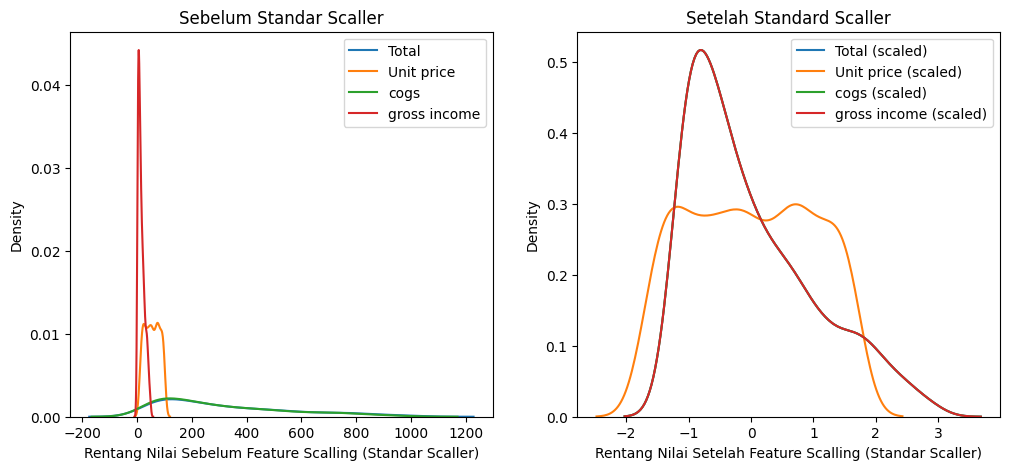

In [ ]:
# kita lihat distribusi dari variabel sebelum standar scaller dan setelah standar scaller
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Standar Scaler
ax1.set_title('Sebelum Standar Scaller')
sns.kdeplot(data_supermarket['Total'], ax=ax1, label='Total')
sns.kdeplot(data_supermarket['Unit price'], ax=ax1, label='Unit price')
sns.kdeplot(data_supermarket['cogs'], ax=ax1, label='cogs')
sns.kdeplot(data_supermarket['gross income'], ax=ax1, label='gross income')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah Standard Scaller')
sns.kdeplot(data_supermarket['Total_stds'], ax=ax2, label='Total (scaled)')
sns.kdeplot(data_supermarket['Unit price_stds'], ax=ax2, label='Unit price (scaled)')
sns.kdeplot(data_supermarket['cogs_stds'], ax=ax2, label='cogs (scaled)')
sns.kdeplot(data_supermarket['gross income_stds'], ax=ax2, label='gross income (scaled)')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Feature Scalling (Standar Scaller)')
ax2.set_xlabel('Rentang Nilai Setelah Feature Scalling (Standar Scaller)')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

In [ ]:
# Checking statistical summary
# After standar scaller process the result has -> standar deviation (std) = 1 and mean = 0
data_supermarket[['Total','Total_stds','Unit price','Unit price_stds',
                  'cogs','cogs_stds','gross income','gross income_stds']].describe()
# 3.197442e-17 = 3.197442 x 10^-17 = 0.00000000000000003197442 ~ 0
# 1.000500e+00 = 1.000500 x 10^0 ~ 1

,Total,Total_stds,Unit price,Unit price_stds,cogs,cogs_stds,gross income,gross income_stds
count,1000.000000,1.000000e+03,1000.000000,1.000000e+03,1000.00000,1.000000e+03,1000.000000,1.000000e+03
mean,322.966749,3.197442e-17,55.672130,-1.065814e-16,307.58738,1.776357e-17,15.379369,1.243450e-16
std,245.885335,1.000500e+00,26.494628,1.000500e+00,234.17651,1.000500e+00,11.708825,1.000500e+00
min,10.678500,-1.270692e+00,10.080000,-1.721668e+00,10.17000,-1.270692e+00,0.508500,-1.270692e+00
25%,124.422375,-8.078714e-01,32.875000,-8.608740e-01,118.49750,-8.078714e-01,5.924875,-8.078714e-01
50%,253.848000,-2.812422e-01,55.230000,-1.669588e-02,241.76000,-2.812422e-01,12.088000,-2.812422e-01
75%,471.350250,6.037682e-01,77.935000,8.406991e-01,448.90500,6.037682e-01,22.445250,6.037682e-01
max,1042.650000,2.928371e+00,99.960000,1.672416e+00,993.00000,2.928371e+00,49.650000,2.928371e+00


Dari grafik diatas sebelum di standar scaller, kita bisa lihat bahwa pendapatan gross income tidak sebanding dengan unit price dan juga tidak sebanding dengan pendapatan (total) dan cogs yg didapat. Hal ini disebabkan oleh harga barang yang terlalu tinggi atau perhitungan yang error walaupun barang nya tidak terlalu banyak sehingga gross income nya cenderung tinggi.

Oleh sebab itu setelah di standarin, hasilnya menjadi merata cenderung tidak terlalu jomplang hasilnya yang mana hasil dari nilai standar (simpangan baku) dan mean nya ialah 1 dan 0. Makanya, hasil yang didapat persis seperti dengan distribusi normal walaupun menceng keluar sedikit ke kiri but its okay.

# 3. MinMax Scaller for Exploratory Data Analysis ?
`clue` : lakukan tanpa splitting dataset ke train dan test
- lakukan pada kolom Total, Unit Price, dan tambahkan 2 kolom lainnya
- dan tulis insight dari yang anda dapat dari grafik tersebut

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# Kolom-kolom yang ingin di MinMaxScaler
columns_to_minmax_2 =  ['Total','Unit price','cogs', 'gross income']
# Inisialisasi MinMaxScaler
minmax_1 = MinMaxScaler()

In [ ]:
# Menerapkan normalisasi Min-Max ke data pelatihan (train)
data_supermarket[['Total_minmax', 'Unit price_minmax',
                  'cogs_minmax', 'gross income_minmax']] = minmax_1.fit_transform(data_supermarket[columns_to_minmax_2])

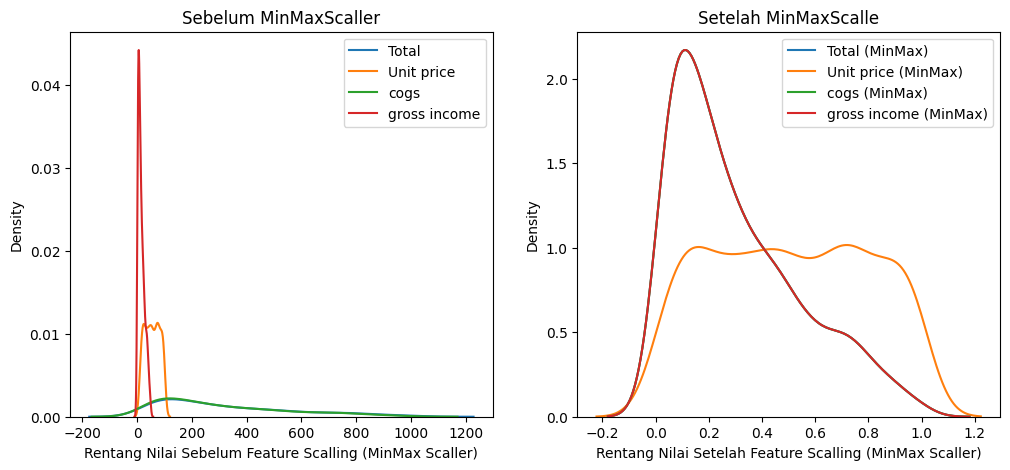

In [ ]:
# kita lihat distribusi dari variabel sebelum standar MinMaxScaller dan setelah MinMaxScaller
import matplotlib.pyplot as plt
import seaborn as sns

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# Plot distribusi sebelum Standar Scaler
ax1.set_title('Sebelum MinMaxScaller')
sns.kdeplot(data_supermarket['Total'], ax=ax1, label='Total')
sns.kdeplot(data_supermarket['Unit price'], ax=ax1, label='Unit price')
sns.kdeplot(data_supermarket['cogs'], ax=ax1, label='cogs')
sns.kdeplot(data_supermarket['gross income'], ax=ax1, label='gross income')

# Plot distribusi setelah Standar Scaler
ax2.set_title('Setelah MinMaxScalle')
sns.kdeplot(data_supermarket['Total_minmax'], ax=ax2, label='Total (MinMax)')
sns.kdeplot(data_supermarket['Unit price_minmax'], ax=ax2, label='Unit price (MinMax)')
sns.kdeplot(data_supermarket['cogs_minmax'], ax=ax2, label='cogs (MinMax)')
sns.kdeplot(data_supermarket['gross income_minmax'], ax=ax2, label='gross income (MinMax)')

# Set x-labels
ax1.set_xlabel('Rentang Nilai Sebelum Feature Scalling (MinMax Scaller)')
ax2.set_xlabel('Rentang Nilai Setelah Feature Scalling (MinMax Scaller)')

# Menampilkan legenda
ax1.legend()
ax2.legend()

plt.show()

In [ ]:
# Checking statistical summary
# After standar MinMax process the result has -> min (minimum) = 0 and max (maximum) = 1
data_supermarket[['Total','Total_minmax','Unit price','Unit price_minmax',
                  'cogs','cogs_minmax', 'gross income','gross income_minmax']].describe()
# min = 0.000000 ~ 0
# max = 1.000000 ~ 1

,Total,Total_minmax,Unit price,Unit price_minmax,cogs,cogs_minmax,gross income,gross income_minmax
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,322.966749,0.302613,55.672130,0.507256,307.58738,0.302613,15.379369,0.302613
std,245.885335,0.238268,26.494628,0.294778,234.17651,0.238268,11.708825,0.238268
min,10.678500,0.000000,10.080000,0.000000,10.17000,0.000000,0.508500,0.000000
25%,124.422375,0.110220,32.875000,0.253616,118.49750,0.110220,5.924875,0.110220
50%,253.848000,0.235636,55.230000,0.502336,241.76000,0.235636,12.088000,0.235636
75%,471.350250,0.446400,77.935000,0.754951,448.90500,0.446400,22.445250,0.446400
max,1042.650000,1.000000,99.960000,1.000000,993.00000,1.000000,49.650000,1.000000


Dari grafik diatas sebelum di standar scaller, kita bisa lihat bahwa pendapatan gross income tidak sebanding dengan unit price dan juga tidak sebanding dengan pendapatan (total) dan cogs yg didapat. Hal ini disebabkan oleh harga barang yang terlalu tinggi atau perhitungan yang error walaupun barang nya tidak terlalu banyak sehingga gross income nya cenderung tinggi.

Oleh sebab itu setelah di standarin, hasilnya menjadi merata cenderung tidak terlalu jomplang hasilnya yang mana hasil dari nilai maximum dan minimum nya ialah 1 dan 0. Makanya, hasil yang didapat persis seperti dengan distribusi normal walaupun menceng keluar sedikit ke kiri but its okay.